In [1]:
#Libraries
import sys
from PIL import Image
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


In [2]:
#import image and gray scale process
image = Image.open("10.png")
imageL = Image.open('10.png').convert('L')
imageL


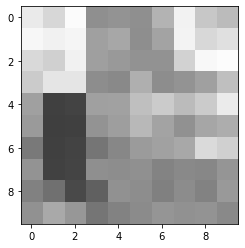

In [3]:
#Y' = 0.2989 R + 0.5870 G + 0.1140 B 
#method to convert gray scale
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('10.png')     
gray = rgb2gray(img)

#Show method
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()


252
[[233 214 251 143 147 142 178 241 198 186]
 [246 240 244 159 166 142 162 243 215 223]
 [217 207 240 159 152 146 145 209 247 251]
 [203 228 228 141 136 174 141 147 159 191]
 [160  64  67 160 160 190 202 186 202 234]
 [153  63  64 147 158 183 163 145 166 172]
 [120  64  67 116 134 155 160 167 217 207]
 [146  65  68 143 141 143 130 136 134 149]
 [128 111  73  95 144 141 127 140 130 152]
 [144 169 150 116 129 138 148 145 147 136]]


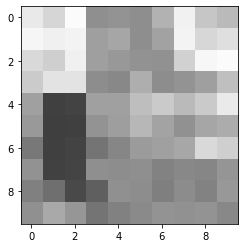

In [4]:
from matplotlib import pyplot as plt
#method to convert gray scale
imar = np.array(image)
print(imar[0,0,1])
gri= np.empty([10, 10], dtype=int)
for x in range(10):
    for y in range(10):
        #gri[x,y]=(imar[x,y,0] + imar[x,y,1] + imar[x,y,2])/3
        gri[x,y]=((imar[x,y,0]*0.299) + (imar[x,y,1]*0.587) + (imar[x,y,2]*0.114))
print(gri)
plt.imshow(gri, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.show()

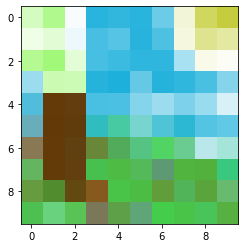

In [5]:
from matplotlib import pyplot as plt
image_array = np.array(image)
plt.imshow(image_array, interpolation='nearest')
plt.show()

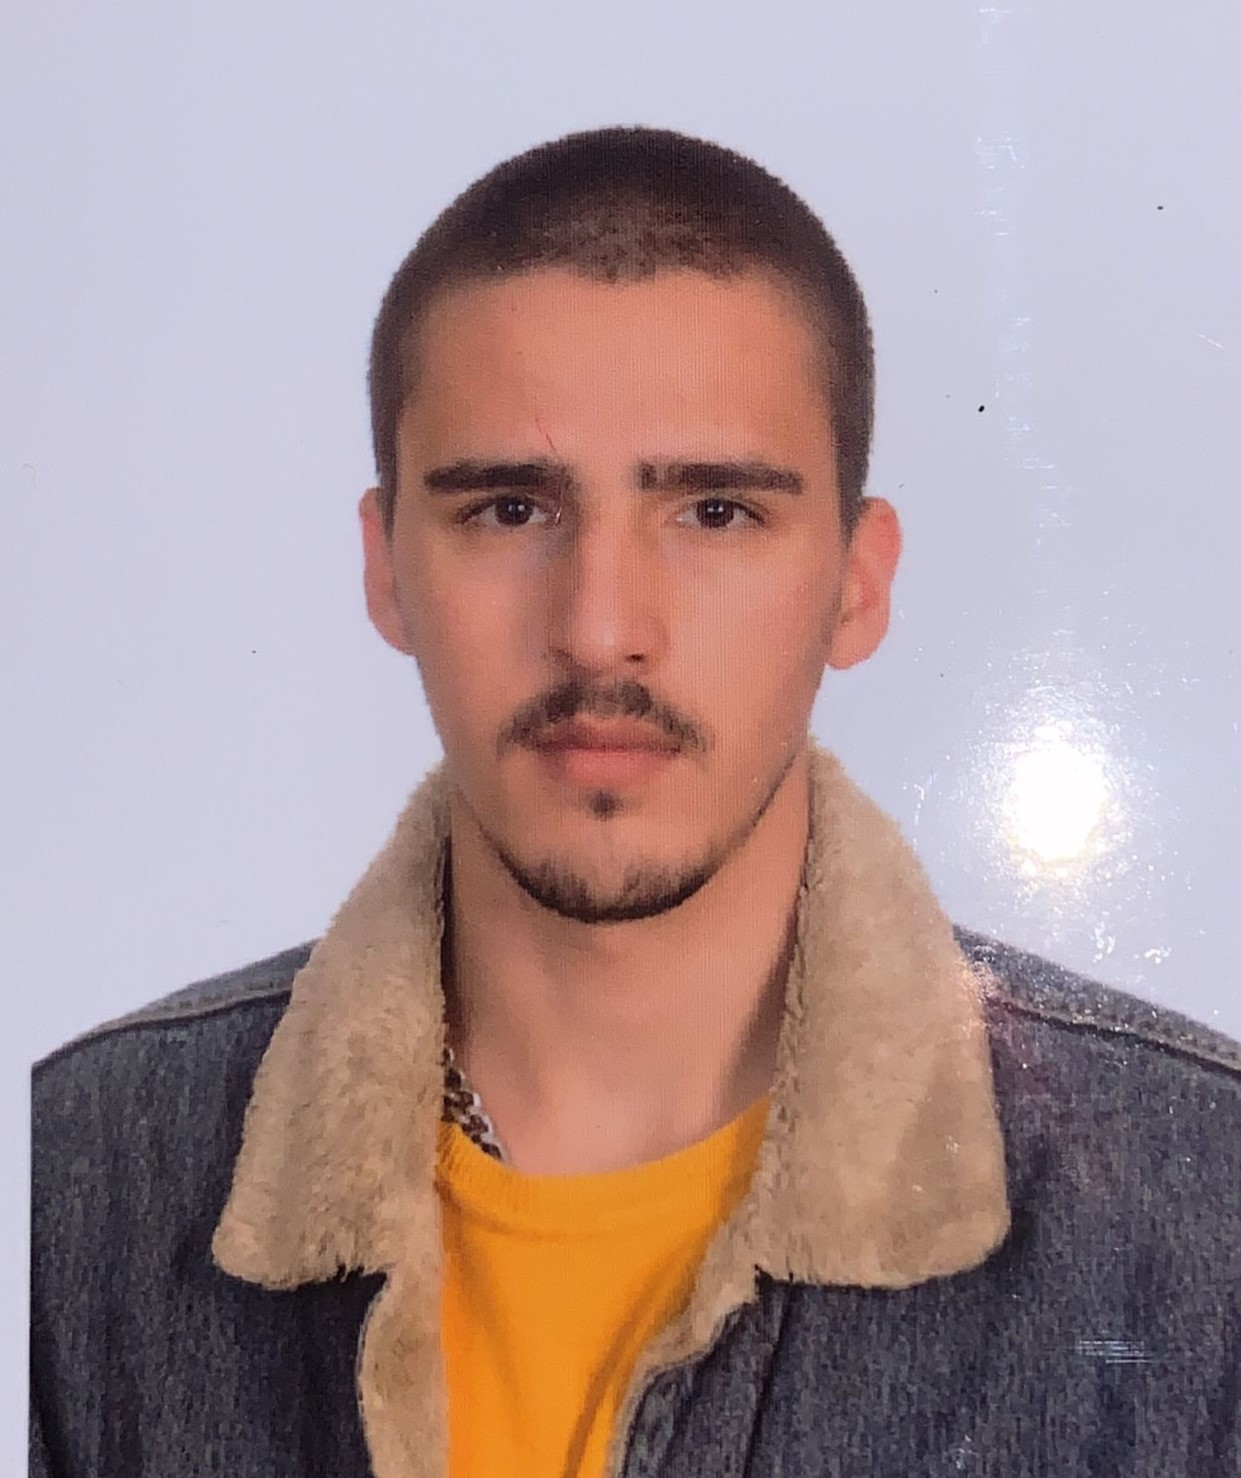

In [6]:
#Crop image
myimage=Image.open('vs.jpg')
widht, height = myimage.size
left = 200
top =150
right= 1000
bottom= 950
myimage

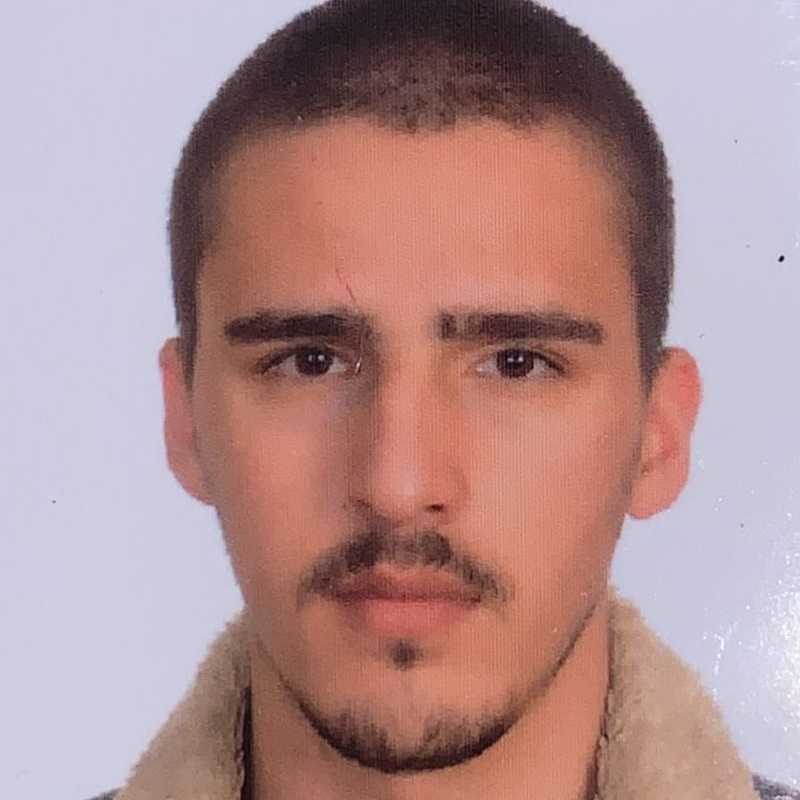

In [7]:
myim =myimage.crop((left,top,right,bottom))
mywidht, myheight=myim.size
myim

[[206 206 206 ... 210 211 212]
 [206 206 206 ... 208 208 208]
 [206 206 206 ... 209 209 209]
 ...
 [206 206 206 ... 130 126 126]
 [206 206 206 ... 129 125 128]
 [207 207 207 ... 124 125 125]]


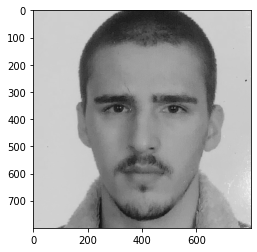

In [8]:
#Gray scale
myarim = np.array(myim)
grimyim= np.empty([mywidht,myheight], dtype=int)
for x in range(mywidht):
    for y in range(myheight):
        grimyim[x,y]=((myarim[x,y,0]*0.299) + (myarim[x,y,1]*0.587) + (myarim[x,y,2]*0.114))
print(grimyim)
plt.imshow(grimyim, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.show()

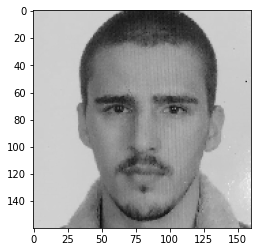

In [63]:
#Image Compression
w, h= grimyim.shape[:2]
#w and h is weight and height
xNew= int(w*1/5)
yNew= int(h*1/5)

xScale= xNew/(w-1)
yScale= yNew/(h-1)

newImage = np.empty([xNew, yNew], dtype=int);
 
for i in range(xNew):
   for j in range(yNew):
       newImage[i , j]= grimyim[1 + int(i / xScale), 1 + int(j / yScale)]
plt.imshow(newImage, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.show()

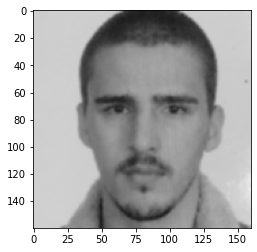

In [64]:
#Gaussian Blur 
from scipy import signal

gaus=[[1,2,1],
      [2,4,2],
      [1,2,1]]

gaus=np.array(gaus)
gausfilter=gaus/16

gaussianblur=signal.convolve2d(newImage,gausfilter,boundary='symm',mode='same')
gaussianblur = gaussianblur.astype(int)

plt.imshow(gaussianblur, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.show()

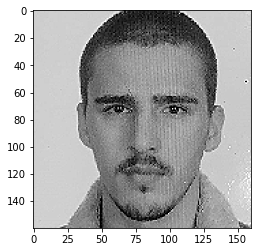

In [65]:
#Image sharpening
sharp=[[0,-2,0],
      [-2,11,-2],
      [0,-2,0]]

sharp=np.array(sharp)
sharpfilter=sharp/3

sharpenning=signal.convolve2d(newImage,sharpfilter,boundary='symm',mode='same')
sharpenning = sharpenning.astype(int)

plt.imshow(sharpenning, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.show()

Text(0.5, 1.0, 'Second')

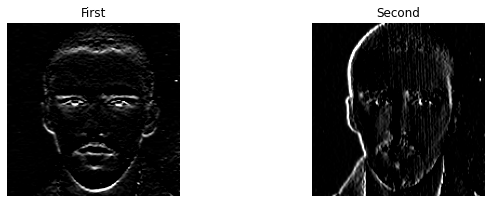

In [66]:
#Edge detection
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
sobelver=np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

sobelhor=np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])
edgedetectver=signal.convolve2d(newImage,sobelver,boundary='symm',mode='same')
edgedetectver=edgedetectver.astype(int)

edgedetecthor=signal.convolve2d(newImage,sobelhor,boundary='symm',mode='same')
edgedetecthor=edgedetecthor.astype(int)
fig.add_subplot(rows, columns, 1)
plt.imshow(edgedetecthor, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.axis('off')
plt.title("First")
fig.add_subplot(rows, columns, 2)
plt.imshow(edgedetectver, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
plt.axis('off')
plt.title("Second")


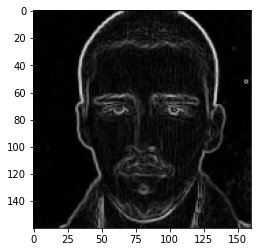

In [67]:
#Edge detection formula 
edgedetection= np.sqrt(np.square(edgedetectver) + np.square(edgedetecthor))
plt.imshow(edgedetection, cmap=plt.get_cmap('gray'),vmin=0, vmax=255)
edgedetection *= 255.0 / edgedetection.max()
plt.imshow(edgedetection, cmap=plt.get_cmap('gray'),vmin=0, vmax=255) 